# Begin

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas.plotting import scatter_matrix

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
data  = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/wine-reviews/winemag-data-130k-v2.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
del data['Unnamed: 0']

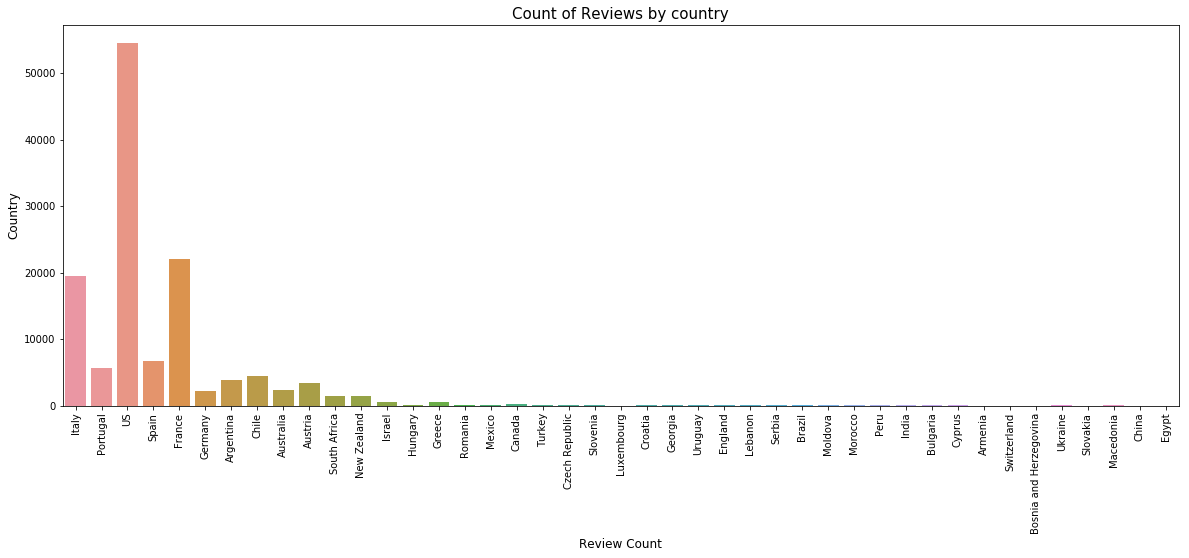

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

plt.figure(figsize=(20,7))
sns.countplot(x="country", data=data)
plt.ylabel("Country",fontsize = 12)
plt.xlabel("Review Count", fontsize=12)
plt.xticks(rotation=90)
plt.title("Count of Reviews by country", fontsize=15)
plt.show()

In [5]:
data.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


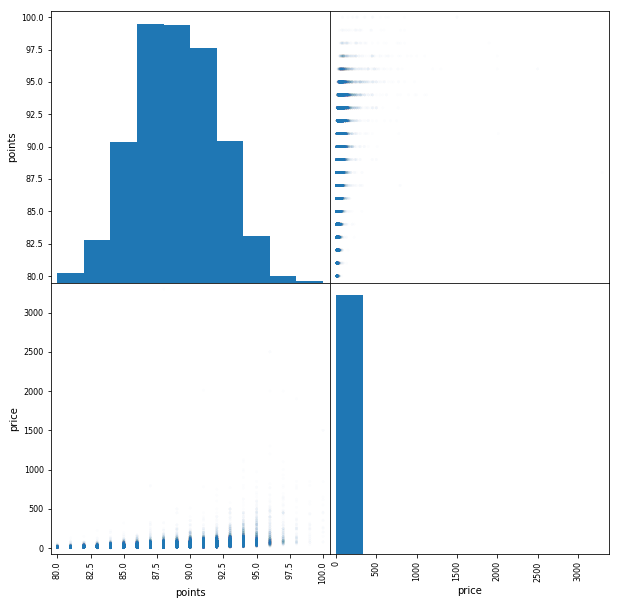

In [0]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [0]:
data.corr()

,points,price
points,1.000000,0.416167
price,0.416167,1.000000


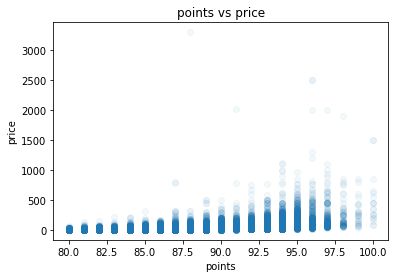

In [0]:
plt.plot(data['points'], data['price'], 'o', alpha = 0.05)
plt.xlabel('points')
plt.ylabel('price')
plt.title('points vs price')
pass

# Готовим данные

In [0]:
data

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [0]:
country_list = ['US','Italy','France','Spain','Chile','Argentina','Portugal','Australia','New Zealand','Germany','South Africa']
sub_data = data[data['country'].isin(country_list)]

In [7]:
categorical_columns = [c for c in sub_data.columns if sub_data[c].dtype.name == 'object']
numerical_columns   = [c for c in sub_data.columns if sub_data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['country', 'description', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']
['points', 'price']


# Обрабатываем пропущенные значения

In [8]:
sub_data.median(axis = 0)

points    88.0
price     25.0
dtype: float64

In [0]:
sub_data = sub_data.fillna(sub_data.median(axis = 0), axis = 0)

In [10]:
sub_data[numerical_columns].count(axis = 0)

points    124059
price     124059
dtype: int64

In [11]:
sub_data[categorical_columns].count(axis = 0)

country                  124059
description              124059
designation               87685
province                 124059
region_1                 108467
region_2                  50511
taster_name               97835
taster_twitter_handle     93087
title                    124059
variety                  124058
winery                   124059
dtype: int64

In [12]:
sub_data['country'].describe()

count     124059
unique        11
top           US
freq       54504
Name: country, dtype: object

In [13]:
sub_data['country'].describe().top

'US'

In [0]:
sub_data['country'] = sub_data['country'].fillna('US')

In [15]:
sub_data.describe(include = [object])

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,124059,124059,87685,124059,108467,50511,97835,93087,124059,124058,124059
unique,11,114587,35871,221,1218,17,17,14,113487,598,16044
top,US,"Stalky aromas suggest hay and green herbs, wit...",Reserve,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,1873,36247,4480,11065,24381,24381,11,13081,222


In [0]:
data_describe = sub_data.describe(include = [object])
for c in categorical_columns:
    sub_data[c] = sub_data[c].fillna(data_describe[c]['top'])

In [17]:
sub_data.describe(include = [object])

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,124059,124059,124059,124059,124059,124059,124059,124059,124059,124059,124059
unique,11,114587,35871,221,1218,17,17,14,113487,598,16044
top,US,"Stalky aromas suggest hay and green herbs, wit...",Reserve,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,38247,36247,20072,84613,50605,55353,11,13082,222


# Векторизация

In [18]:
data_describe = sub_data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2 ]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['country', 'description', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']


In [0]:
# data = data.dropna()

del sub_data['taster_name']
del sub_data['taster_twitter_handle']

In [0]:
wine_France = sub_data[sub_data['country'] == 'France']

In [22]:
value_counts = wine_France["variety"].value_counts()
value_counts.head()

Bordeaux-style Red Blend    4725
Chardonnay                  2808
Pinot Noir                  1966
Rosé                        1923
Champagne Blend             1243
Name: variety, dtype: int64

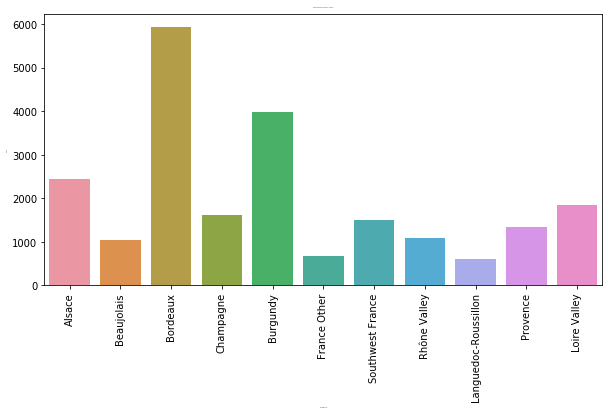

In [23]:
plt.figure(figsize=(10,5))
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
sns.countplot(x="province", data=wine_France,)
plt.ylabel("province",fontsize = .1)
plt.xlabel("Review Count", fontsize=.1)
plt.title("Count of Reviews by province in France", fontsize=.2)
plt.xticks(rotation=90)
plt.show()

In [0]:
varietylist = ['Bordeaux-style Red Blend','Chardonnay','Pinot Noir','Rosé','Champagne Blend']
subdata = wine_France[wine_France['variety'].isin(varietylist)]

In [0]:
subdata

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
63,France,"This fat, yeasty Champagne is comprised predom...",Brut Rosé,86,58.0,Champagne,Champagne,Central Coast,Roland Champion NV Brut Rosé (Champagne),Champagne Blend,Roland Champion
65,France,"From the warm 2015 vintage, this is a soft and...",Reserve,86,24.0,Burgundy,Chablis,Central Coast,Simonnet-Febvre 2015 Chablis,Chardonnay,Simonnet-Febvre
66,France,"This soft, rounded wine is ripe with generous ...",Reserve,86,15.0,Burgundy,Mâcon-Milly Lamartine,Central Coast,Vignerons des Terres Secrètes 2015 Mâcon-Mill...,Chardonnay,Vignerons des Terres Secrètes
69,France,"This cooperative, based in Aÿ, has benefited f...",Brut Rosé,86,55.0,Champagne,Champagne,Central Coast,Collet NV Brut Rosé (Champagne),Champagne Blend,Collet
136,France,This wine's black cherry and plum flavors veer...,Reserve,91,50.0,Bordeaux,Saint-Émilion,Central Coast,Lassègue 2003 Saint-Émilion,Bordeaux-style Red Blend,Lassègue
179,France,The impact of 50-year old vines is seen in the...,Les Vénérables Vieilles Vignes,88,27.0,Burgundy,Chablis,Central Coast,La Chablisienne 2006 Les Vénérables Vieilles V...,Chardonnay,La Chablisienne
193,France,"A citrus-dominated wine, lime and lemon giving...",Reserve,87,35.0,Burgundy,St.-Romain,Central Coast,Bertrand Ambroise 2006 St.-Romain,Chardonnay,Bertrand Ambroise
290,France,This is a wine that has great potential—you ca...,Reserve,92,25.0,Bordeaux,Saint-Estèphe,Central Coast,Château Lafon-Rochet 2011 Saint-Estèphe,Bordeaux-style Red Blend,Château Lafon-Rochet
307,France,"Rich and full in the mouth, packed with red fr...",Les Dames Huguettes,87,30.0,Burgundy,Côte de Nuits-Villages,Central Coast,Domaine Bertagna 2009 Les Dames Huguettes (Cô...,Pinot Noir,Domaine Bertagna
334,France,"A ripe, fruity wine that takes its raspberry f...",Mosaïque Rosé Brut,86,42.0,Champagne,Champagne,Central Coast,Jacquart NV Mosaïque Rosé Brut (Champagne),Champagne Blend,Jacquart


In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(subdata['variety'])
label_encoded_y = label_encoder.transform(subdata['variety'])
subdata['encoded_winevariety'] = label_encoded_y
subdata.head()


,country,description,designation,points,price,province,region_1,region_2,title,variety,winery,encoded_winevariety
63,France,"This fat, yeasty Champagne is comprised predom...",Brut Rosé,86,58.0,Champagne,Champagne,Central Coast,Roland Champion NV Brut Rosé (Champagne),Champagne Blend,Roland Champion,1
65,France,"From the warm 2015 vintage, this is a soft and...",Reserve,86,24.0,Burgundy,Chablis,Central Coast,Simonnet-Febvre 2015 Chablis,Chardonnay,Simonnet-Febvre,2
66,France,"This soft, rounded wine is ripe with generous ...",Reserve,86,15.0,Burgundy,Mâcon-Milly Lamartine,Central Coast,Vignerons des Terres Secrètes 2015 Mâcon-Mill...,Chardonnay,Vignerons des Terres Secrètes,2
69,France,"This cooperative, based in Aÿ, has benefited f...",Brut Rosé,86,55.0,Champagne,Champagne,Central Coast,Collet NV Brut Rosé (Champagne),Champagne Blend,Collet,1
136,France,This wine's black cherry and plum flavors veer...,Reserve,91,50.0,Bordeaux,Saint-Émilion,Central Coast,Lassègue 2003 Saint-Émilion,Bordeaux-style Red Blend,Lassègue,0


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    min_df=5, max_features=100, strip_accents='unicode',lowercase =True,
    analyzer='word', token_pattern=r'\w+', use_idf=True, 
    smooth_idf=True, sublinear_tf=True, stop_words = 'english').fit(subdata["description"])

In [27]:
features = tfidf.get_feature_names()
print(features)

['2017', '2018', '2019', 'acidity', 'aftertaste', 'age', 'aging', 'apple', 'aromas', 'attractive', 'balance', 'balanced', 'berry', 'black', 'blackberry', 'blend', 'bodied', 'bright', 'character', 'cherry', 'citrus', 'comes', 'concentrated', 'core', 'crisp', 'currant', 'dark', 'delicious', 'dense', 'drink', 'dry', 'edge', 'end', 'fine', 'finish', 'firm', 'flavor', 'flavors', 'fresh', 'freshness', 'fruit', 'fruitiness', 'fruits', 'fruity', 'generous', 'gives', 'giving', 'good', 'great', 'intense', 'juicy', 'just', 'light', 'lively', 'merlot', 'mineral', 'needs', 'packed', 'palate', 'perfumed', 'plenty', 'plum', 'potential', 'powerful', 'produced', 'ready', 'red', 'rich', 'richness', 'ripe', 'rose', 'rounded', 's', 'showing', 'shows', 'smoky', 'smooth', 'soft', 'solid', 'spice', 'strawberry', 'structure', 'structured', 'style', 'sweet', 'tannic', 'tannins', 'texture', 'textured', 'tight', 'toast', 'touch', 'vintage', 'weight', 'white', 'wine', 'wood', 'years', 'yellow', 'young']


In [0]:
X_tfidf_text = tfidf.transform(subdata["description"])

# Нормализация количественных признаков

In [0]:
sub_data_2 = pd.DataFrame(X_tfidf_text.toarray())
subdata = subdata.reset_index()
sub_data_2['encoded_winevariety'] = subdata['encoded_winevariety']
sub_data_2['variety'] = subdata['variety']

In [0]:
sub_data_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,encoded_winevariety,variety
0,0.000000,0.0,0.00000,0.196421,0.386009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.371860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.202077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363648,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350532,0.280603,0.000000,0.000000,0.227411,0.000000,0.000000,0.300702,0.000000,0.000000,0.000000,0.000000,0.327385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,Champagne Blend
1,0.000000,0.0,0.00000,0.173982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.178992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223931,0.000000,0.000000,0.198324,0.000000,0.000000,0.276236,0.000000,0.000000,0.418064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.201432,0.000000,0.000000,0.266350,0.000000,0.000000,0.000000,0.000000,0.289986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.383654,0.000000,0.407912,0.120588,0.000000,0.000000,0.000000,0.000000,2,Chardonnay
2,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.357019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291966,0.000000,0.000000,0.000000,0.320708,0.000000,0.365667,0.250461,0.000000,0.000000,0.000000,0.361246,0.272686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.113394,0.000000,0.000000,0.000000,0.364294,2,Chardonnay
3,0.000000,0.0,0.00000,0.206401,0.405623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.388909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.212345,0.000000,0.000000,0.000000,0.421885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.368344,0.294861,0.000000,0.000000,0.238966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.344021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.143058,0.000000,0.000000,0.000000,0.000000,1,Champagne Blend
4,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

# Обучающая и тестовая выборки

In [0]:
from sklearn.model_selection import train_test_split
seed = 6

test_size = 0.2
y = sub_data_2['encoded_winevariety']
X = sub_data_2.drop(['encoded_winevariety','variety'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


In [31]:
print(X.shape)
print(y.shape)

(12665, 100)
(12665,)


In [32]:
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

10132 2533


# KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6, n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

In [0]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.22670746150809318 0.31385708645874455


In [0]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[843   9  20  41  22]
 [ 28  99  70   7  30]
 [ 66  55 425   7  30]
 [214   8  16 123  33]
 [ 28  32  57  22 248]]


In [0]:
from sklearn.model_selection import GridSearchCV

neighbors = [1, 3, 5, 10, 20, 30, 40, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': neighbors}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.2924397947098303 45


In [0]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors, n_jobs=-1).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.2765495459928938 0.2806948282668772


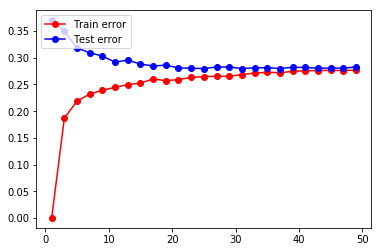

In [0]:
interval = range(1, 50, 2)

err_train = []
err_test = []

for k in interval:
    knn_neighbors = KNeighborsClassifier(n_neighbors = k)
    knn_neighbors.fit(X_train, y_train)
    
    err_train.append(np.mean(knn_neighbors.predict(X_train) != y_train))
    err_test.append(np.mean(knn_neighbors.predict(X_test) != y_test))
    
plt.plot(interval, err_train, 'r-o', label = 'train')
plt.plot(interval, err_test,  'b-o', label = 'test')  

plt.legend(loc = 2)

# SVC

In [0]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.3181010659297276 0.30754046585076983


In [0]:
y_test_predict = svc.predict(X_test)
print(confusion_matrix(y_test, y_test_predict))

[[894   0  23   3  15]
 [ 20   0 168   1  45]
 [ 36   0 542   0   5]
 [313   0  21  21  39]
 [ 27   0  63   0 297]]


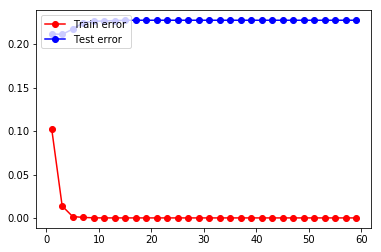

In [0]:
interval = range(1, 60, 2)

err_train = []
err_test = []

for c in interval:
    svc_scale = SVC(C = c, gamma = 'scale')
    svc_scale.fit(X_train, y_train)
    err_train.append(np.mean(svc_scale.predict(X_train) != y_train))
    err_test.append(np.mean(svc_scale.predict(X_test) != y_test))
    
plt.plot(interval, err_train, 'r-o', label = 'train')
plt.plot(interval, err_test,  'b-o', label = 'test')
plt.legend(loc = 2)

# Random Forest

In [0]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

9.869719699960521e-05 0.20489538097118043


In [0]:
y_test_predict = rf.predict(X_test)
print(confusion_matrix(y_test, y_test_predict))

[[851   1  29  36  18]
 [  5  90  97   3  39]
 [ 13  15 539   3  13]
 [143   3  11 202  35]
 [  6  13  29   7 332]]


In [0]:
np.sum(rf.feature_importances_)

1.0

In [0]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = X.columns
N, d = X.shape

print("Features:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Features:
 1. feature '   86' (0.083415)
 2. feature '   66' (0.057261)
 3. feature '   13' (0.049062)
 4. feature '   70' (0.029559)
 5. feature '   95' (0.027739)
 6. feature '   98' (0.024069)
 7. feature '   24' (0.022475)
 8. feature '    7' (0.022371)
 9. feature '    3' (0.020197)
10. feature '   29' (0.017157)
11. feature '   96' (0.017089)
12. feature '   40' (0.016889)
13. feature '   80' (0.015903)
14. feature '   35' (0.015649)
15. feature '   25' (0.015493)
16. feature '   30' (0.015408)
17. feature '   69' (0.014796)
18. feature '   20' (0.014718)
19. feature '   19' (0.014667)
20. feature '   14' (0.014411)
21. feature '   50' (0.014143)
22. feature '   37' (0.013761)
23. feature '   42' (0.013145)
24. feature '   87' (0.012192)
25. feature '   55' (0.011788)
26. feature '   72' (0.011604)
27. feature '   81' (0.011498)
28. feature '   12' (0.011225)
29. feature '   67' (0.010902)
30. feature '   77' (0.010450)
31. feature '   26' (0.010365)
32. feature '   54' (0.009986

In [0]:
feature_names[[1,0,1]]

Index([1, 0, 1], dtype='object')

(-1, 20)

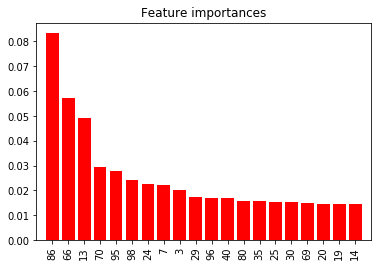

In [0]:
d_first = 20
plt.title("Feature importances")

plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

# Extremely Randomized Trees

In [0]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

9.869719699960521e-05 0.20963284642716146


In [0]:
y_test_predict = ert.predict(X_test)
print(confusion_matrix(y_test, y_test_predict))

[[858   1  25  35  16]
 [  6  91  92   5  40]
 [ 17  20 528   3  15]
 [150   4   9 197  34]
 [ 10   8  32   9 328]]


# AdaBoost

In [34]:
from sklearn import ensemble

ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.30783655744176863 0.3335965258586656


In [36]:
from sklearn.metrics import confusion_matrix

y_test_predict = ada.predict(X_test)
print(confusion_matrix(y_test, y_test_predict))

[[786   4  32  92  21]
 [  9 102  82  15  26]
 [ 20  59 459  21  24]
 [193   5  18 152  26]
 [ 20  88  36  54 189]]


# GBT

In [37]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.009573628108961705 0.204500592183182


In [38]:
y_test_predict = gbt.predict(X_test)
print(confusion_matrix(y_test, y_test_predict))

[[825   1  28  63  18]
 [  5 124  70   8  27]
 [ 10  30 516   5  22]
 [108   7  13 238  28]
 [  8  20  26  21 312]]


# PCA

In [0]:
Для ваших данных применить PCA для сокращения размерности пространства признаков. 
Изобразить точки, сократив размерность пространства до 2. К новым данным применить 
классификатор ближайших соседей (с наилучшим значением к-ва соседей, полученнных ранее).
Построить графики зависимости ошибки на тестовой и обучающей выборки в зависимости 
от количества используемых компонент. Найти наилучшее значение количества 
используемых главных компонент.


In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X)

In [41]:
pca_data

array([[ 0.27881469,  0.24842781],
       [ 0.15283764, -0.0993093 ],
       [ 0.1204665 , -0.09377794],
       ...,
       [-0.18352408,  0.15444226],
       [-0.3446219 , -0.03989124],
       [-0.14341442,  0.07766236]])

Text(0.5, 1.0, 'dim = 2')

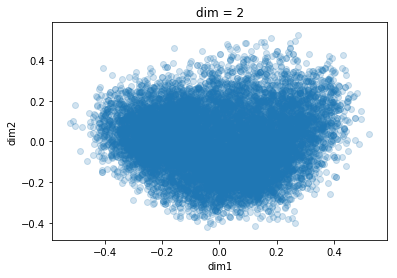

In [42]:
plt.scatter(pca_data[:,0], pca_data[:,1], alpha = .2)

plt.xlabel('dim1')
plt.ylabel('dim2')
plt.title('dim = 2')

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

8865 3800


In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 45, n_jobs=-1).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.3187817258883249 0.34078947368421053


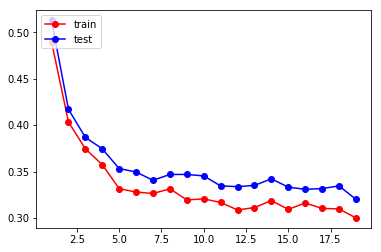

In [49]:
dim = range(1, 20, 1)
err_train = []
err_test = []

for d in dim:
    pca = PCA(n_components = d)
    pca_data = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size = 0.3, random_state = 42)
    
    knn = KNeighborsClassifier(n_neighbors = 45, n_jobs=-1).fit(X_train, y_train)
    
    err_train.append(np.mean(knn.predict(X_train) != y_train))
    err_test.append(np.mean(knn.predict(X_test) != y_test))
    
plt.plot(dim, err_train, 'r-o', label = 'train')
plt.plot(dim, err_test,  'b-o', label = 'test')    
plt.legend(loc = 2)

In [0]:
Найти наилучшее значение количества 
используемых главных компонент.

Как видно из графика - при увеличении кол-ва компонент, ошибка падает. 